In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.python.keras import backend as k
from tensorflow.keras import backend
#from keras import backend as K
from tensorflow_core.python.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn
import cv2 
from tqdm import tqdm
from PIL import Image

Using TensorFlow backend.


In [2]:
print(os.listdir('C:/Users/ntadi/Pictures'))

['.tmp.drivedownload', 'Camera Roll', 'desktop.ini', 'Pictures.zip', 's1', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's2', 's20', 's21', 's22', 's23', 's24', 's3', 's4', 's5', 's6', 's7', 's8', 's9']


In [3]:
test1 = cv2.imread('narayana.jpeg')

In [4]:
test1

array([[[139, 173, 226],
        [140, 174, 227],
        [140, 174, 227],
        ...,
        [120, 153, 199],
        [120, 153, 199],
        [120, 153, 199]],

       [[139, 173, 226],
        [140, 174, 227],
        [140, 174, 227],
        ...,
        [120, 153, 199],
        [120, 153, 199],
        [120, 153, 199]],

       [[139, 173, 226],
        [140, 174, 227],
        [140, 174, 227],
        ...,
        [120, 153, 199],
        [120, 153, 199],
        [120, 153, 199]],

       ...,

       [[ 53,  42, 174],
        [ 53,  42, 174],
        [ 51,  42, 176],
        ...,
        [ 42,  64, 190],
        [ 41,  64, 190],
        [ 41,  64, 190]],

       [[ 53,  42, 174],
        [ 53,  42, 174],
        [ 53,  42, 174],
        ...,
        [ 42,  64, 193],
        [ 42,  65, 191],
        [ 42,  65, 191]],

       [[ 53,  42, 174],
        [ 53,  42, 174],
        [ 53,  42, 174],
        ...,
        [ 42,  64, 193],
        [ 42,  65, 191],
        [ 42,  65, 191]]

In [5]:
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)
gray_img

array([[185, 186, 186, ..., 163, 163, 163],
       [185, 186, 186, ..., 163, 163, 163],
       [185, 186, 186, ..., 163, 163, 163],
       ...,
       [ 83,  83,  83, ...,  99,  99,  99],
       [ 83,  83,  83, ..., 100, 100, 100],
       [ 83,  83,  83, ..., 100, 100, 100]], dtype=uint8)

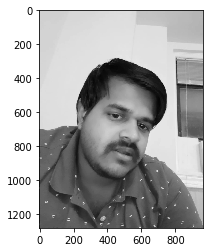

In [6]:
plt.imshow(gray_img, cmap='gray')

In [7]:
haar_face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [8]:
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5);

In [9]:
print('Faces found: ', len(faces))

Faces found:  1


In [10]:
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 5)

    

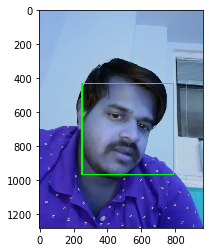

In [11]:
plt.imshow(test1)

In [12]:
faces=[]
Z=[]
IMG_SIZE=32
ab_DIR='C:/Users/ntadi/Pictures/ab'
bhumra_DIR='C:/Users/ntadi/Pictures/bhumra'
bindu_DIR='C:/Users/ntadi/Pictures/bindu'
dhawan_DIR='C:/Users/ntadi/Pictures/dhawan'
chahal_DIR='C:/Users/ntadi/Pictures/chahal'
chiru_DIR='C:/Users/ntadi/Pictures/chiru'
dhoni_DIR='C:/Users/ntadi/Pictures/dhoni'
gayle_DIR='C:/Users/ntadi/Pictures/gayle'
indu_DIR='C:/Users/ntadi/Pictures/indu'
koti_DIR='C:/Users/ntadi/Pictures/koti'
narayana_DIR='C:/Users/ntadi/Pictures/narayana'
prabhas_DIR='C:/Users/ntadi/Pictures/prabhas'
ragini_DIR='C:/Users/ntadi/Pictures/ragini'
rana_DIR='C:/Users/ntadi/Pictures/rana'
ravi_DIR='C:/Users/ntadi/Pictures/ravi'
redd_DIR='C:/Users/ntadi/Pictures/redd'
rohit_DIR='C:/Users/ntadi/Pictures/rohit'
sachin_DIR='C:/Users/ntadi/Pictures/sachin'
samar_DIR='C:/Users/ntadi/Pictures/samar'
siva_DIR='C:/Users/ntadi/Pictures/siva'
surya_DIR='C:/Users/ntadi/Pictures/surya'
velu_DIR='C:/Users/ntadi/Pictures/velu'
venkey_DIR='C:/Users/ntadi/Pictures/venkey'
vk_DIR='C:/Users/ntadi/Pictures/vk'

In [13]:
def assign_label(img,person):
    return person

In [14]:
def make_train_data(person,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,person)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        faces = haar_face_cascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=5);
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        faces.append(np.array(img))
        Z.append(str(label))

In [15]:
print('Faces found: ', len(faces))

Faces found:  0


In [16]:
make_train_data('ab',ab_DIR)
make_train_data('bhumra',bhumra_DIR)
make_train_data('bindu',bindu_DIR)
make_train_data('dhawan',dhawan_DIR)
make_train_data('chahal',chahal_DIR)
make_train_data('chiru',chiru_DIR)
make_train_data('dhoni',dhoni_DIR)
make_train_data('gayle',gayle_DIR)
make_train_data('indu',indu_DIR)
make_train_data('koti',koti_DIR)
make_train_data('narayana',narayana_DIR)
make_train_data('prabhas',prabhas_DIR)
make_train_data('ragini',ragini_DIR)
make_train_data('rana',rana_DIR)
make_train_data('ravi',ravi_DIR)
make_train_data('redd',redd_DIR)
make_train_data('rohit',rohit_DIR)
make_train_data('sachin',sachin_DIR)
make_train_data('samar',samar_DIR)
make_train_data('siva',siva_DIR)
make_train_data('surya',surya_DIR)
make_train_data('velu',velu_DIR)
make_train_data('venkey',venkey_DIR)
make_train_data('vk',vk_DIR)

print(len(faces))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/ntadi/Pictures/ab'

In [ ]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title(' '+Z[l])
        
plt.tight_layout()

In [ ]:
le=LabelEncoder()
Y=list(Z)
Y=le.fit_transform(Z)
Y=to_categorical(Y,24)
X=np.array(X)
X=X/255


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Z,test_size=0.25,random_state=42)

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(24, activation = "softmax"))

In [ ]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=3,factor=0.1)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 200, validation_data = (x_test,y_test), verbose =1, steps_per_epoch=x_train.shape[0] // batch_size)

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [ ]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==12):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==12):
        break

In [ ]:
count=0
fig,ax=plt.subplots(4,3)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (3):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted object : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual object : "+str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

In [ ]:
count=0
fig,ax=plt.subplots(15,6)
fig.set_size_inches(15,15)
for i in range (15):
    for j in range (6):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted object : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual object : "+str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1